# EDA_FE 과제 
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/교육 세션/airbnb_listings.csv', index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [6]:
# Q1
pd.set_option('display.max_columns', None)
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [7]:
# Q2
df.isnull().sum()


id                                      0
host_response_time                  19006
host_response_rate                  19006
host_acceptance_rate                14015
host_is_superhost                       5
host_listings_count                     5
host_total_listings_count               5
host_verifications                      0
host_has_profile_pic                    5
host_identity_verified                  5
neighborhood                            0
latitude                                0
longitude                               0
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                              54
bedrooms                               77
beds                                  482
bed_type                                0
amenities                               0
square_feet                         50407
price                             

In [45]:
#Q2 
df_null=df.isnull().sum().to_frame()
df_null.columns=['missingnum']
df_null['missingnum']=df_null['missingnum'].apply(lambda x: int(x) if x > 0 else None)
df_null.dropna(inplace=True)
df_null.sort_values('missingnum', ascending=False, inplace = True)
df_null['missing_%'] = df_null['missingnum'].apply(lambda x: round(int(x) / len(df) * 100, 1))
df_null

,missingnum,missing_%
jurisdiction_names,50781.0,100.0
license,50759.0,99.9
square_feet,50407.0,99.2
monthly_price,46119.0,90.8
weekly_price,45411.0,89.4
host_response_rate,19006.0,37.4
host_response_time,19006.0,37.4
security_deposit,17325.0,34.1
host_acceptance_rate,14015.0,27.6
review_scores_value,11482.0,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

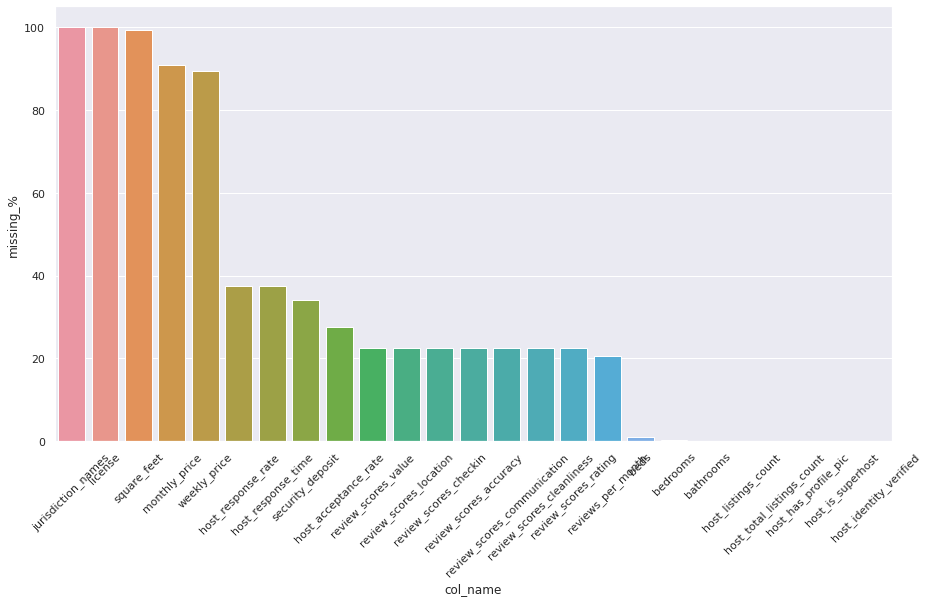

In [79]:
# Q3
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x=df_null.index , y='missing_%', data=df_null, ci = False)

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다. 
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [80]:
# Q4
df[df['beds'].isnull()].head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
col_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [81]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [82]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다. 
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

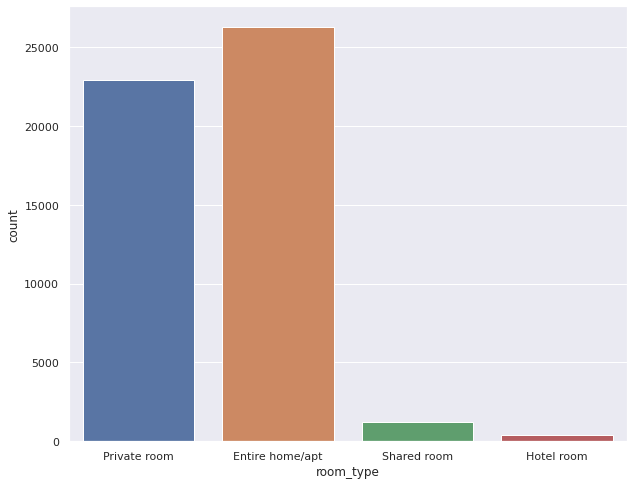

In [86]:
# Q5
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x = 'room_type', data = df)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

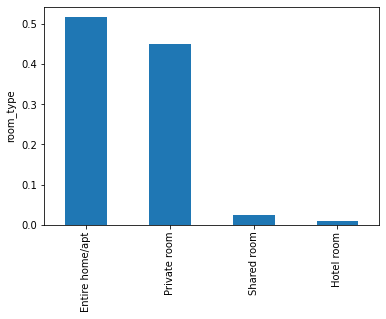

In [19]:
# Q6
plt.ylabel('room_type', fontsize=10)
df['room_type'].value_counts(normalize = True).plot(kind = "bar")

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

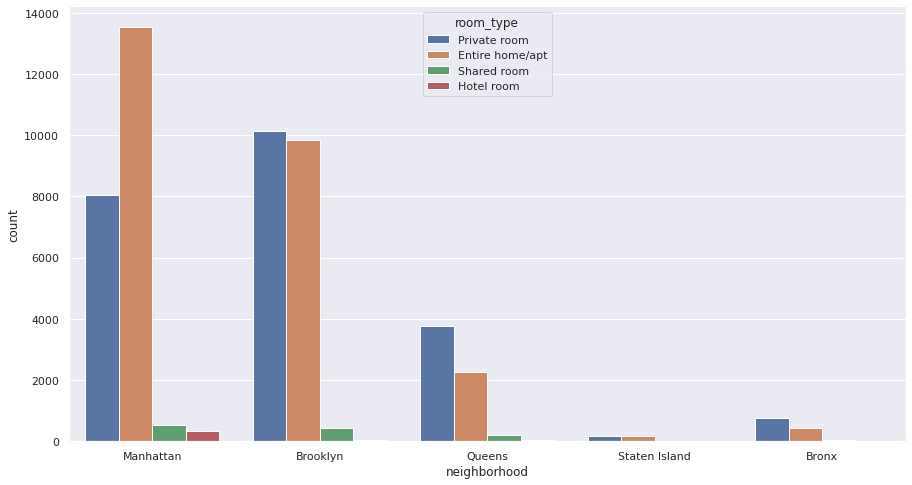

In [89]:
# Q7
sns.barplot(x='room_type' , y='missing_%', data=df_null, ci = False)
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x = 'neighborhood', data = df, hue = 'room_type')

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

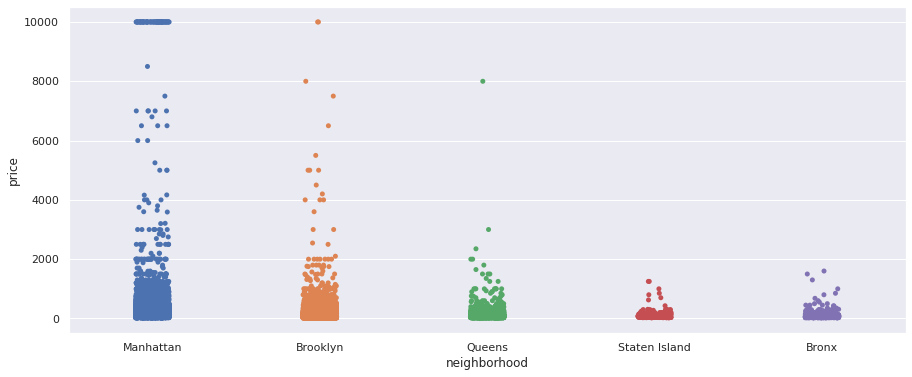

In [91]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
sns.set(rc={'figure.figsize':(15,6)})
sns.stripplot(x = 'neighborhood', y = 'price', data = df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9
manhattan, brooklyn, queens에 이상치가 존재한다



---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

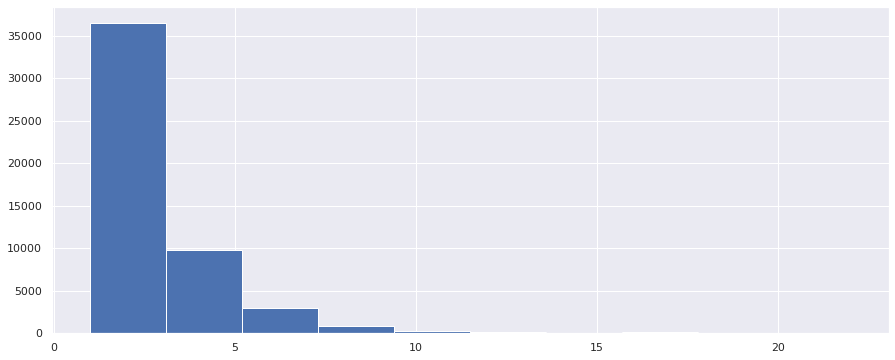

In [95]:
# Q10
plt.hist(x = "accommodates", data = df, bins = 10)
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

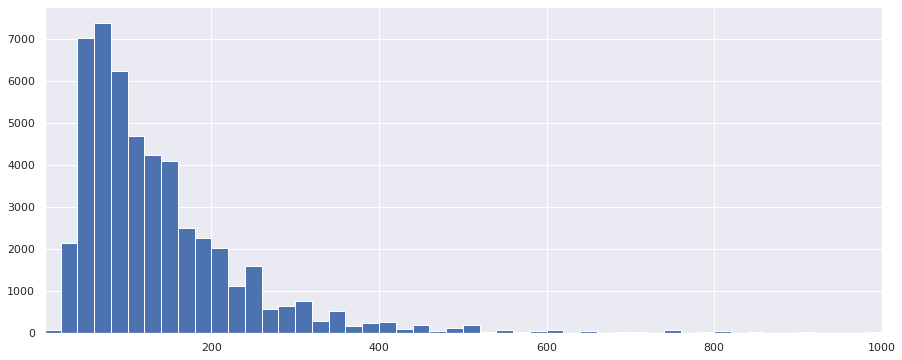

In [112]:
# Q11
plt.xlim(1,1000)
plt.hist(x = "price", data = df, bins =500)
plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [114]:
df = pd.read_csv('/content/drive/MyDrive/교육 세션/airbnb_listings.csv', index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [180]:
#Q12
df.drop(columns = df.columns[(df.isnull().sum() / len(df) *100) >= 25], axis=1, inplace=True)
df.drop(columns = df.columns[(df.isnull().sum() / len(df) *100) >= 10], inplace=True)

null = ['host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds']

for i in null:
  if type(df[i]) == float:
    df[i].fillna({i:df[i].median()}, inplace = True)
  else:
    df[i].fillna({i:df[i].mode()[0]}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50796 non-null  int64  
 2   host_listings_count               50796 non-null  float64
 3   host_total_listings_count         50796 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50796 non-null  object 
 6   host_identity_verified            50796 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [164]:
#Q13-1) price의 범위가 넓고 oulier가 존재하며, 상대적인 가격 비교가 어려우므로 지표 변수를 생성(25%, 50%, 75% 대표값을 기준으로)
print("---Price---\n",df['price'].unique()[:10])
df['price'].describe()

price_level = []
for a in df['price']:
  if a >= 175:
    price_level.append('expensive')
  elif a >= 105:
    price_level.append('a little expensive')
  elif a >= 69:
    price_level.append('a little cheap')
  else:
    price_level.append('a cheap')

df['price_level'] = price_level
df.head()

---Price---
 [100 225  89 200  94  60  79 150  99 160]


,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price_level
0,2060,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",100,1,$0.00,1,730,t,30,60,90,365,1,0,f,f,f,flexible,f,f,a little cheap
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,1,$0.00,7,1125,t,4,34,64,339,48,5,f,f,f,strict_14_with_grace_period,t,t,expensive
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,1,$0.00,1,730,t,6,10,13,151,313,69,f,f,f,moderate,f,f,a little cheap
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,2,$100.00,3,21,t,0,0,0,0,78,8,f,f,f,moderate,t,t,expensive
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",94,1,$13.00,1,730,t,30,60,90,109,75,0,f,f,f,strict_14_with_grace_period,f,f,a little cheap


In [179]:
#Q13-2) 중앙값과 최빈값을 활용하여 결측치 제거
df.drop(columns = df.columns[(df.isnull().sum() / len(df) *100) >= 25], axis=1, inplace=True)
df.drop(columns = df.columns[(df.isnull().sum() / len(df) *100) >= 10], inplace=True)

null = ['host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds']

for i in null:
  if type(df[i]) == float:
    df[i].fillna({i:df[i].median()}, inplace = True)
  else:
    df[i].fillna({i:df[i].mode()[0]}, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50796 non-null  int64  
 2   host_listings_count               50796 non-null  float64
 3   host_total_listings_count         50796 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50796 non-null  object 
 6   host_identity_verified            50796 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

In [178]:
#Q13-3) 서로 다른 범위의 데이터, 특히 outlier가 있는 price변수에 대해 standard scaler 적용
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()

sd_scaler = sd_scaler.fit_transform(df['price'].values.reshape(-1,1))
df['sd_scaled_price'] = sd_scaler

df.head()

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price_level,sd_scaled_price
0,2060,0,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi}",100,1,$0.00,1,730,t,30,60,90,365,1,0,f,f,f,flexible,f,f,a little cheap,-0.152844
1,2595,0,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,1,$0.00,7,1125,t,4,34,64,339,48,5,f,f,f,strict_14_with_grace_period,t,t,expensive,0.135361
2,3831,0,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,1,$0.00,1,730,t,6,10,13,151,313,69,f,f,f,moderate,f,f,a little cheap,-0.178206
3,5099,0,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,2,$100.00,3,21,t,0,0,0,0,78,8,f,f,f,moderate,t,t,expensive,0.077720
4,5114,0,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",94,1,$13.00,1,730,t,30,60,90,109,75,0,f,f,f,strict_14_with_grace_period,f,f,a little cheap,-0.166678


In [176]:
#Q13-4) 라벨 인코딩을 통해 문자열을 숫자열로 변환
print("---host_is_superhost---\n",df['host_is_superhost'].unique()[:10])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoded = encoder.fit_transform(df['host_is_superhost'])
df['host_is_superhost'] = encoded

df.host_is_superhost.value_counts()

---host_is_superhost---
 [0 1]


0    40857
1     9939
Name: host_is_superhost, dtype: int64

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요. 
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
